In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from collections import defaultdict


In [2]:
class DiceGame:
    def __init__(self, dice, sides, rolls):
        self.dice = dice    # 骰子數
        self.sides = sides  # 幾面
        self.rolls = rolls  #幾局
     
        self.rate=0.1 # 輸贏的加碼率 
    def oneRoll(self):
        total = [random.randint(1, self.sides) for i in range(self.dice) ]
        return sum(total)
    
    def gameResult(self, guess, presult, oresult):
        if guess==0 and (oresult>presult):
            return True
        elif guess==1 and (oresult<presult):
            return True
        else:
            return False
    
    def roll(self):
        d = defaultdict(int)
        for _ in range(self.rolls):
            d[sum(random.randint(1, self.sides) for _ in range(self.dice))] += 1
        return d

In [3]:
class GamePlayer: 
    def __init__(self): 
        self.deposit = 10000 # 1萬存款
        
        
    def startRollDice(self, objfun):
        return objfun()

In [4]:
dice = DiceGame(2,6,1)
player=GamePlayer()
owner=GamePlayer()

In [5]:
# dice01 = DiceGame(2,6,1)
# ans01 = dice01.oneRoll()

# dice02 = DiceGame(2,6,1)
# ans02 = dice01.oneRoll()
# ans01,ans02

In [6]:
log_df = pd.DataFrame()
count = 0
basebet = 10
winRate=0.9999
loseRate=1.0002
while player.deposit >0:
    if count==0:
        gameresultDict = {
            'result' : '尚未開局' ,
            'count' : int(count) ,
            'money' : player.deposit ,
            'bet' : basebet ,
        }
        log_df=log_df.append(gameresultDict , ignore_index=True)
    
    count +=1    
    guess = random.randint(0, 1) # 猜大小，0為小，1為大
    ownerResult = owner.startRollDice(dice.oneRoll)
    playerResult = player.startRollDice(dice.oneRoll)
    gameresult = dice.gameResult(guess=guess, presult=playerResult, oresult=ownerResult)
    
    
    
    if gameresult:
        # win
        
        if count==1:
            # 首局
            player.deposit += basebet # 本金異動
            basebet *=winRate               #下次賭資異動
        else:
            
            player.deposit += basebet  # 本金異動    
            basebet *=winRate                #下次賭資異動
        
        
        gameresultDict = {
            'result' : 'Win' if gameresult else 'Lose' ,
            'count' : int(count) ,
            'money' : player.deposit ,
            'bet' : basebet ,
        }
        log_df=log_df.append(gameresultDict , ignore_index=True)
        print('第{}局狀況:{}。目前本金:{}。目前賭資:{}'.format(count,'== Win ==',player.deposit,basebet))
        
    else:
        # lose
        
        if count==1:
            player.deposit -= basebet # 本金異動
            basebet *=loseRate               #下次賭資異動
        else:
            player.deposit -= basebet # 本金異動
            basebet *=loseRate               #下次賭資異動
            
        gameresultDict = {
            'result' : 'Win' if gameresult else 'Lose' ,
            'count' : int(count) ,
            'money' : player.deposit ,
            'bet' : basebet ,
        }
        log_df=log_df.append(gameresultDict , ignore_index=True)
        
        print('第{}局狀況:{}。目前本金:{}。目前賭資:{}'.format(count,'== Lose ==',player.deposit,basebet))
    
    
    

第1局狀況:== Win ==。目前本金:10010。目前賭資:9.999
第2局狀況:== Lose ==。目前本金:10000.001。目前賭資:10.0009998
第3局狀況:== Win ==。目前本金:10010.0019998。目前賭資:9.99999970002
第4局狀況:== Win ==。目前本金:10020.00199950002。目前賭資:9.998999700049998
第5局狀況:== Win ==。目前本金:10030.00099920007。目前賭資:9.997999800079993
第6局狀況:== Lose ==。目前本金:10020.00299939999。目前賭資:9.999999400040009
第7局狀況:== Win ==。目前本金:10030.002998800031。目前賭資:9.998999400100004
第8局狀況:== Win ==。目前本金:10040.001998200132。目前賭資:9.997999500159994
第9局狀況:== Win ==。目前本金:10049.999997700292。目前賭資:9.996999700209978
第10局狀況:== Lose ==。目前本金:10040.002998000082。目前賭資:9.99899910015002
第11局狀況:== Lose ==。目前本金:10030.003998899932。目前賭資:10.00099889997005
第12局狀況:== Lose ==。目前本金:10020.002999999962。目前賭資:10.002999099750044
第13局狀況:== Win ==。目前本金:10030.005999099712。目前賭資:10.001998799840068
第14局狀況:== Win ==。目前本金:10040.007997899553。目前賭資:10.000998599960084
第15局狀況:== Lose ==。目前本金:10030.006999299592。目前賭資:10.002998799680077
第16局狀況:== Lose ==。目前本金:10020.004000499912。目前賭資:10.004999399440013
第17局狀況:== Win ==。目前本金:10030

第162局狀況:== Win ==。目前本金:9778.858420477047。目前賭資:10.114630127474218
第163局狀況:== Lose ==。目前本金:9768.743790349572。目前賭資:10.116653053499713
第164局狀況:== Lose ==。目前本金:9758.627137296073。目前賭資:10.118676384110412
第165局狀況:== Lose ==。目前本金:9748.508460911962。目前賭資:10.120700119387234
第166局狀況:== Lose ==。目前本金:9738.387760792575。目前賭資:10.122724259411111
第167局狀況:== Lose ==。目前本金:9728.265036533165。目前賭資:10.124748804262993
第168局狀況:== Lose ==。目前本金:9718.140287728902。目前賭資:10.126773754023844
第169局狀況:== Lose ==。目前本金:9708.013513974878。目前賭資:10.128799108774649
第170局狀況:== Lose ==。目前本金:9697.884714866104。目前賭資:10.130824868596404
第171局狀況:== Lose ==。目前本金:9687.753889997508。目前賭資:10.132851033570123
第172局狀況:== Lose ==。目前本金:9677.621038963938。目前賭資:10.134877603776838
第173局狀況:== Lose ==。目前本金:9667.48616136016。目前賭資:10.136904579297592
第174局狀況:== Lose ==。目前本金:9657.349256780863。目前賭資:10.138931960213451
第175局狀況:== Win ==。目前本金:9667.488188741076。目前賭資:10.13791806701743
第176局狀況:== Lose ==。目前本金:9657.350270674058。目前賭資:10.139945650630834
第177局狀況:== Win

第331局狀況:== Win ==。目前本金:9565.998983931328。目前賭資:10.232619762496947
第332局狀況:== Lose ==。目前本金:9555.76636416883。目前賭資:10.234666286449446
第333局狀況:== Lose ==。目前本金:9545.531697882381。目前賭資:10.236713219706736
第334局狀況:== Win ==。目前本金:9555.768411102088。目前賭資:10.235689548384766
第335局狀況:== Lose ==。目前本金:9545.532721553704。目前賭資:10.237736686294443
第336局狀況:== Lose ==。目前本金:9535.294984867409。目前賭資:10.239784233631703
第337局狀況:== Lose ==。目前本金:9525.055200633777。目前賭資:10.241832190478428
第338局狀況:== Win ==。目前本金:9535.297032824255。目前賭資:10.24080800725938
第339局狀況:== Win ==。目前本金:9545.537840831515。目前賭資:10.239783926458655
第340局狀況:== Lose ==。目前本金:9535.298056905056。目前賭資:10.241831883243947
第341局狀況:== Lose ==。目前本金:9525.056225021812。目前賭資:10.243880249620595
第342局狀況:== Lose ==。目前本金:9514.812344772192。目前賭資:10.245929025670518
第343局狀況:== Win ==。目前本金:9525.058273797862。目前賭資:10.244904432767951
第344局狀況:== Win ==。目前本金:9535.30317823063。目前賭資:10.243879942324675
第345局狀況:== Win ==。目前本金:9545.547058172955。目前賭資:10.242855554330443
第346局狀況:== Win ==。目前

第476局狀況:== Win ==。目前本金:9226.384449475769。目前賭資:10.358201005792758
第477局狀況:== Win ==。目前本金:9236.742650481561。目前賭資:10.357165185692178
第478局狀況:== Lose ==。目前本金:9226.385485295868。目前賭資:10.359236618729316
第479局狀況:== Win ==。目前本金:9236.744721914598。目前賭資:10.358200695067444
第480局狀況:== Lose ==。目前本金:9226.38652121953。目前賭資:10.360272335206457
第481局狀況:== Win ==。目前本金:9236.746793554737。目前賭資:10.359236307972935
第482局狀況:== Lose ==。目前本金:9226.387557246764。目前賭資:10.36130815523453
第483局狀況:== Lose ==。目前本金:9216.02624909153。目前賭資:10.363380416865576
第484局狀況:== Lose ==。目前本金:9205.662868674664。目前賭資:10.365453092948949
第485局狀況:== Win ==。目前本金:9216.028321767613。目前賭資:10.364416547639653
第486局狀況:== Lose ==。目前本金:9205.663905219973。目前賭資:10.36648943094918
第487局狀況:== Win ==。目前本金:9216.030394650923。目前賭資:10.365452782006086
第488局狀況:== Win ==。目前本金:9226.395847432928。目前賭資:10.364416236727886
第489局狀況:== Lose ==。目前本金:9216.031431196201。目前賭資:10.366489119975231
第490局狀況:== Lose ==。目前本金:9205.664942076226。目前賭資:10.368562417799225
第491局狀況:== Win ==。目前本

第637局狀況:== Lose ==。目前本金:9007.944141131798。目前賭資:10.474842227517017
第638局狀況:== Lose ==。目前本金:8997.469298904281。目前賭資:10.47693719596252
第639局狀況:== Win ==。目前本金:9007.946236100244。目前賭資:10.475889502242925
第640局狀況:== Win ==。目前本金:9018.422125602487。目前賭資:10.474841913292702
第641局狀況:== Lose ==。目前本金:9007.947283689195。目前賭資:10.47693688167536
第642局狀況:== Win ==。目前本金:9018.42422057087。目前賭資:10.475889187987192
第643局狀況:== Win ==。目前本金:9028.900109758857。目前賭資:10.474841599068395
第644局狀況:== Lose ==。目前本金:9018.425268159788。目前賭資:10.476936567388208
第645局狀況:== Win ==。目前本金:9028.902204727176。目前賭資:10.475888873731469
第646局狀況:== Win ==。目前本金:9039.378093600906。目前賭資:10.474841284844096
第647局狀況:== Win ==。目前本金:9049.85293488575。目前賭資:10.473793800715612
第648局狀況:== Win ==。目前本金:9060.326728686465。目前賭資:10.47274642133554
第649局狀況:== Lose ==。目前本金:9049.85398226513。目前賭資:10.474840970619807
第650局狀況:== Lose ==。目前本金:9039.37914129451。目前賭資:10.47693593881393
第651局狀況:== Lose ==。目前本金:9028.902205355696。目前賭資:10.479031326001694
第652局狀況:== Win ==。目前本金:903

第795局狀況:== Win ==。目前本金:9008.320234035544。目前賭資:10.55790036109175
第796局狀況:== Lose ==。目前本金:8997.762333674453。目前賭資:10.56001194116397
第797局狀況:== Lose ==。目前本金:8987.202321733288。目前賭資:10.562123943552201
第798局狀況:== Lose ==。目前本金:8976.640197789737。目前賭資:10.56423636834091
第799局狀況:== Lose ==。目前本金:8966.075961421397。目前賭資:10.56634921561458
第800局狀況:== Lose ==。目前本金:8955.509612205782。目前賭資:10.568462485457703
第801局狀況:== Win ==。目前本金:8966.07807469124。目前賭資:10.567405639209158
第802局狀況:== Win ==。目前本金:8976.64548033045。目前賭資:10.566348898645236
第803局狀況:== Lose ==。目前本金:8966.079131431805。目前賭資:10.568462168424965
第804局狀況:== Lose ==。目前本金:8955.51066926338。目前賭資:10.57057586085865
第805局狀況:== Win ==。目前本金:8966.081245124238。目前賭資:10.569518803272564
第806局狀況:== Win ==。目前本金:8976.650763927511。目前賭資:10.568461851392236
第807局狀況:== Win ==。目前本金:8987.219225778903。目前賭資:10.567405005207096
第808局狀況:== Lose ==。目前本金:8976.651820773695。目前賭資:10.569518486208137
第809局狀況:== Lose ==。目前本金:8966.082302287487。目前賭資:10.571632389905378
第810局狀況:== Win ==。目前本金:8

第955局狀況:== Win ==。目前本金:8860.514788905866。目前賭資:10.665053030257042
第956局狀況:== Win ==。目前本金:8871.179841936124。目前賭資:10.663986524954016
第957局狀況:== Lose ==。目前本金:8860.51585541117。目前賭資:10.666119322259007
第958局狀況:== Win ==。目前本金:8871.181974733428。目前賭資:10.665052710326782
第959局狀況:== Win ==。目前本金:8881.847027443755。目前賭資:10.66398620505575
第960局狀況:== Lose ==。目前本金:8871.183041238699。目前賭資:10.66611900229676
第961局狀況:== Win ==。目前本金:8881.849160240996。目前賭資:10.66505239039653
第962局狀況:== Win ==。目前本金:8892.514212631393。目前賭資:10.66398588515749
第963局狀況:== Lose ==。目前本金:8881.850226746235。目前賭資:10.666118682334522
第964局狀況:== Lose ==。目前本金:8871.1841080639。目前賭資:10.668251906070989
第965局狀況:== Lose ==。目前本金:8860.51585615783。目前賭資:10.670385556452203
第966局狀況:== Lose ==。目前本金:8849.845470601378。目前賭資:10.672519633563493
第967局狀況:== Lose ==。目前本金:8839.172950967815。目前賭資:10.674654137490204
第968局狀況:== Win ==。目前本金:8849.847605105306。目前賭資:10.673586672076455
第969局狀況:== Win ==。目前本金:8860.521191777383。目前賭資:10.672519313409248
第970局狀況:== Win ==。目前本金:887

第1118局狀況:== Win ==。目前本金:8828.828729256893。目前賭資:10.757145855358829
第1119局狀況:== Lose ==。目前本金:8818.071583401534。目前賭資:10.7592972845299
第1120局狀況:== Lose ==。目前本金:8807.312286117003。目前賭資:10.761449143986805
第1121局狀況:== Lose ==。目前本金:8796.550836973016。目前賭資:10.763601433815603
第1122局狀況:== Lose ==。目前本金:8785.787235539201。目前賭資:10.765754154102366
第1123局狀況:== Lose ==。目前本金:8775.021481385098。目前賭資:10.767907304933185
第1124局狀況:== Lose ==。目前本金:8764.253574080165。目前賭資:10.770060886394171
第1125局狀況:== Lose ==。目前本金:8753.48351319377。目前賭資:10.77221489857145
第1126局狀況:== Lose ==。目前本金:8742.711298295199。目前賭資:10.774369341551164
第1127局狀況:== Win ==。目前本金:8753.485667636749。目前賭資:10.77329190461701
第1128局狀況:== Lose ==。目前本金:8742.712375732131。目前賭資:10.775446562997933
第1129局狀況:== Lose ==。目前本金:8731.936929169133。目前賭資:10.777601652310533
第1130局狀況:== Win ==。目前本金:8742.714530821444。目前賭資:10.776523892145303
第1131局狀況:== Win ==。目前本金:8753.49105471359。目前賭資:10.775446239756088
第1132局狀況:== Win ==。目前本金:8764.266500953345。目前賭資:10.774368695132113
第1133局

第1275局狀況:== Lose ==。目前本金:8580.269672942595。目前賭資:10.879367762627679
第1276局狀況:== Lose ==。目前本金:8569.390305179968。目前賭資:10.881543636180204
第1277局狀況:== Win ==。目前本金:8580.271848816148。目前賭資:10.880455481816586
第1278局狀況:== Win ==。目前本金:8591.152304297964。目前賭資:10.879367436268405
第1279局狀況:== Win ==。目前本金:8602.031671734232。目前賭資:10.878279499524778
第1280局狀況:== Win ==。目前本金:8612.909951233756。目前賭資:10.877191671574826
第1281局狀況:== Lose ==。目前本金:8602.032759562182。目前賭資:10.87936710990914
第1282局狀況:== Lose ==。目前本金:8591.153392452274。目前賭資:10.881542983331121
第1283局狀況:== Win ==。目前本金:8602.034935435604。目前賭資:10.880454829032788
第1284局狀況:== Win ==。目前本金:8612.915390264638。目前賭資:10.879366783549884
第1285局狀況:== Win ==。目前本金:8623.794757048188。目前賭資:10.87827884687153
第1286局狀況:== Lose ==。目前本金:8612.916478201318。目前賭資:10.880454502640903
第1287局狀況:== Lose ==。目前本金:8602.036023698676。目前賭資:10.882630593541432
第1288局狀況:== Lose ==。目前本金:8591.153393105134。目前賭資:10.88480711966014
第1289局狀況:== Win ==。目前本金:8602.038200224795。目前賭資:10.883718638948174
第1290局

第1427局狀況:== Win ==。目前本金:8164.120398816094。目前賭資:11.025005772560542
第1428局狀況:== Lose ==。目前本金:8153.0953930435335。目前賭資:11.027210773715053
第1429局狀況:== Lose ==。目前本金:8142.068182269819。目前賭資:11.029416215869796
第1430局狀況:== Win ==。目前本金:8153.097598485689。目前賭資:11.028313274248209
第1431局狀況:== Win ==。目前本金:8164.125911759937。目前賭資:11.027210442920785
第1432局狀況:== Lose ==。目前本金:8153.098701317016。目前賭資:11.029415885009369
第1433局狀況:== Lose ==。目前本金:8142.069285432007。目前賭資:11.03162176818637
第1434局狀況:== Lose ==。目前本金:8131.03766366382。目前賭資:11.033828092540007
第1435局狀況:== Win ==。目前本金:8142.07149175636。目前賭資:11.032724709730754
第1436局狀況:== Win ==。目前本金:8153.104216466091。目前賭資:11.031621437259782
第1437局狀況:== Lose ==。目前本金:8142.0725950288315。目前賭資:11.033827761547233
第1438局狀況:== Lose ==。目前本金:8131.038767267284。目前賭資:11.036034527099542
第1439局狀況:== Lose ==。目前本金:8120.002732740185。目前賭資:11.038241734004961
第1440局狀況:== Win ==。目前本金:8131.04097447419。目前賭資:11.03713790983156
第1441局狀況:== Lose ==。目前本金:8120.003836564359。目前賭資:11.039345337413527
第144

第1588局狀況:== Win ==。目前本金:8020.331451995182。目前賭資:11.135785428455053
第1589局狀況:== Win ==。目前本金:8031.467237423637。目前賭資:11.134671849912207
第1590局狀況:== Lose ==。目前本金:8020.332565573724。目前賭資:11.13689878428219
第1591局狀況:== Win ==。目前本金:8031.469464358007。目前賭資:11.135785094403762
第1592局狀況:== Win ==。目前本金:8042.605249452411。目前賭資:11.134671515894322
第1593局狀況:== Lose ==。目前本金:8031.470577936517。目前賭資:11.136898450197501
第1594局狀況:== Win ==。目前本金:8042.607476386715。目前賭資:11.13578476035248
第1595局狀況:== Win ==。目前本金:8053.743261147067。目前賭資:11.134671181876445
第1596局狀況:== Win ==。目前本金:8064.877932328943。目前賭資:11.133557714758258
第1597局狀況:== Lose ==。目前本金:8053.744374614184。目前賭資:11.135784426301209
第1598局狀況:== Win ==。目前本金:8064.8801590404855。目前賭資:11.134670847858578
第1599局狀況:== Lose ==。目前本金:8053.745488192627。目前賭資:11.13689778202815
第1600局狀況:== Lose ==。目前本金:8042.6085904105985。目前賭資:11.139125161584555
第1601局狀況:== Lose ==。目前本金:8031.469465249014。目前賭資:11.141352986616871
第1602局狀況:== Lose ==。目前本金:8020.328112262398。目前賭資:11.143581257214194
第160

第1749局狀況:== Win ==。目前本金:7897.012999089702。目前賭資:11.244304573595068
第1750局狀況:== Lose ==。目前本金:7885.768694516107。目前賭資:11.246553434509787
第1751局狀況:== Lose ==。目前本金:7874.522141081597。目前賭資:11.248802745196688
第1752局狀況:== Lose ==。目前本金:7863.2733383364。目前賭資:11.251052505745728
第1753局狀況:== Lose ==。目前本金:7852.022285830654。目前賭資:11.253302716246877
第1754局狀況:== Win ==。目前本金:7863.275588546901。目前賭資:11.252177385975251
第1755局狀況:== Lose ==。目前本金:7852.023411160926。目前賭資:11.254427821452445
第1756局狀況:== Lose ==。目前本金:7840.768983339473。目前賭資:11.256678707016736
第1757局狀況:== Lose ==。目前本金:7829.512304632457。目前賭資:11.25893004275814
第1758局狀況:== Win ==。目前本金:7840.771234675215。目前賭資:11.257804149753865
第1759局狀況:== Lose ==。目前本金:7829.513430525461。目前賭資:11.260055710583815
第1760局狀況:== Lose ==。目前本金:7818.253374814878。目前賭資:11.262307721725932
第1761局狀況:== Lose ==。目前本金:7806.991067093152。目前賭資:11.264560183270277
第1762局狀況:== Lose ==。目前本金:7795.726506909882。目前賭資:11.266813095306931
第1763局狀況:== Win ==。目前本金:7806.993320005189。目前賭資:11.2656864139974
第176

第1912局狀況:== Win ==。目前本金:7954.147554725733。目前賭資:11.327798403765598
第1913局狀況:== Win ==。目前本金:7965.475353129499。目前賭資:11.326665623925221
第1914局狀況:== Win ==。目前本金:7976.802018753424。目前賭資:11.325532957362828
第1915局狀況:== Win ==。目前本金:7988.127551710787。目前賭資:11.324400404067092
第1916局狀況:== Win ==。目前本金:7999.451952114854。目前賭資:11.323267964026686
第1917局狀況:== Lose ==。目前本金:7988.128684150827。目前賭資:11.32553261761949
第1918局狀況:== Lose ==。目前本金:7976.803151533208。目前賭資:11.327797724143014
第1919局狀況:== Win ==。目前本金:7988.130949257351。目前賭資:11.3266649443706
第1920局狀況:== Win ==。目前本金:7999.457614201721。目前賭資:11.325532277876164
第1921局狀況:== Lose ==。目前本金:7988.132081923845。目前賭資:11.327797384331738
第1922局狀況:== Win ==。目前本金:7999.459879308177。目前賭資:11.326664604593306
第1923局狀況:== Win ==。目前本金:8010.78654391277。目前賭資:11.325531938132848
第1924局狀況:== Lose ==。目前本金:7999.461011974637。目前賭資:11.327797044520475
第1925局狀況:== Win ==。目前本金:8010.788809019157。目前賭資:11.326664264816023
第1926局狀況:== Win ==。目前本金:8022.115473283973。目前賭資:11.32553159838954
第1927局狀況:==

第2073局狀況:== Win ==。目前本金:7874.573030168353。目前賭資:11.431328219241735
第2074局狀況:== Lose ==。目前本金:7863.141701949112。目前賭資:11.433614484885583
第2075局狀況:== Win ==。目前本金:7874.575316433998。目前賭資:11.432471123437095
第2076局狀況:== Win ==。目前本金:7886.007787557434。目前賭資:11.431327876324751
第2077局狀況:== Win ==。目前本金:7897.439115433759。目前賭資:11.430184743537119
第2078局狀況:== Win ==。目前本金:7908.869300177296。目前賭資:11.429041725062765
第2079局狀況:== Win ==。目前本金:7920.298341902359。目前賭資:11.42789882089026
第2080局狀況:== Lose ==。目前本金:7908.87044308147。目前賭資:11.430184400654438
第2081局狀況:== Lose ==。目前本金:7897.4402586808155。目前賭資:11.432470437534569
第2082局狀況:== Win ==。目前本金:7908.87272911835。目前賭資:11.431327190490816
第2083局狀況:== Lose ==。目前本金:7897.441401927859。目前賭資:11.433613455928914
第2084局狀況:== Win ==。目前本金:7908.875015383788。目前賭資:11.432470094583321
第2085局狀況:== Lose ==。目前本金:7897.442545289205。目前賭資:11.434756588602237
第2086局狀況:== Win ==。目前本金:7908.8773018778065。目前賭資:11.433613112943377
第2087局狀況:== Lose ==。目前本金:7897.4436887648635。目前賭資:11.435899835565966
第208

第2233局狀況:== Lose ==。目前本金:7644.690792017105。目前賭資:11.557742121180711
第2234局狀況:== Win ==。目前本金:7656.248534138286。目前賭資:11.556586346968594
第2235局狀況:== Win ==。目前本金:7667.8051204852545。目前賭資:11.555430688333898
第2236局狀況:== Lose ==。目前本金:7656.24968979692。目前賭資:11.557741774471564
第2237局狀況:== Lose ==。目前本金:7644.691948022449。目前賭資:11.560053322826459
第2238局狀況:== Lose ==。目前本金:7633.1318946996225。目前賭資:11.562365333491023
第2239局狀況:== Lose ==。目前本金:7621.569529366131。目前賭資:11.564677806557722
第2240局狀況:== Lose ==。目前本金:7610.004851559574。目前賭資:11.566990742119033
第2241局狀況:== Lose ==。目前本金:7598.437860817455。目前賭資:11.569304140267457
第2242局狀況:== Win ==。目前本金:7610.007164957722。目前賭資:11.56814720985343
第2243局狀況:== Win ==。目前本金:7621.575312167575。目前賭資:11.566990395132445
第2244局狀況:== Win ==。目前本金:7633.142302562707。目前賭資:11.565833696092932
第2245局狀況:== Win ==。目前本金:7644.708136258801。目前賭資:11.564677112723324
第2246局狀況:== Lose ==。目前本金:7633.1434591460775。目前賭資:11.566990048145868
第2247局狀況:== Lose ==。目前本金:7621.576469097931。目前賭資:11.569303446155498


第2390局狀況:== Lose ==。目前本金:7400.37587092145。目前賭資:11.685554327977355
第2391局狀況:== Lose ==。目前本金:7388.690316593473。目前賭資:11.68789143884295
第2392局狀況:== Lose ==。目前本金:7377.00242515463。目前賭資:11.690229017130719
第2393局狀況:== Win ==。目前本金:7388.692654171761。目前賭資:11.689059994229005
第2394局狀況:== Lose ==。目前本金:7377.003594177532。目前賭資:11.691397806227851
第2395局狀況:== Lose ==。目前本金:7365.312196371305。目前賭資:11.693736085789096
第2396局狀況:== Lose ==。目前本金:7353.6184602855155。目前賭資:11.696074833006254
第2397局狀況:== Lose ==。目前本金:7341.922385452509。目前賭資:11.698414047972854
第2398局狀況:== Lose ==。目前本金:7330.223971404536。目前賭資:11.700753730782449
第2399局狀況:== Lose ==。目前本金:7318.523217673754。目前賭資:11.703093881528604
第2400局狀況:== Lose ==。目前本金:7306.820123792225。目前賭資:11.705434500304909
第2401局狀況:== Win ==。目前本金:7318.52555829253。目前賭資:11.704263956854879
第2402局狀況:== Lose ==。目前本金:7306.821294335676。目前賭資:11.70660480964625
第2403局狀況:== Win ==。目前本金:7318.5278991453215。目前賭資:11.705434149165285
第2404局狀況:== Win ==。目前本金:7330.233333294487。目前賭資:11.704263605750368
第2

第2552局狀況:== Lose ==。目前本金:7189.821247204585。目前賭資:11.812416763995204
第2553局狀況:== Win ==。目前本金:7201.633663968581。目前賭資:11.811235522318805
第2554局狀況:== Lose ==。目前本金:7189.822428446262。目前賭資:11.813597769423268
第2555局狀況:== Win ==。目前本金:7201.636026215685。目前賭資:11.812416409646326
第2556局狀況:== Win ==。目前本金:7213.448442625331。目前賭資:11.811235168005362
第2557局狀況:== Win ==。目前本金:7225.259677793337。目前賭資:11.810054044488561
第2558局狀況:== Lose ==。目前本金:7213.449623748848。目前賭資:11.812416055297458
第2559局狀況:== Lose ==。目前本金:7201.637207693551。目前賭資:11.814778538508516
第2560局狀況:== Lose ==。目前本金:7189.822429155043。目前賭資:11.817141494216218
第2561局狀況:== Win ==。目前本金:7201.639570649259。目前賭資:11.815959780066796
第2562局狀況:== Win ==。目前本金:7213.455530429326。目前賭資:11.814778184088789
第2563局狀況:== Win ==。目前本金:7225.270308613415。目前賭資:11.81359670627038
第2564局狀況:== Win ==。目前本金:7237.083905319686。目前賭資:11.812415346599753
第2565局狀況:== Lose ==。目前本金:7225.271489973086。目前賭資:11.814777829669072
第2566局狀況:== Lose ==。目前本金:7213.4567121434175。目前賭資:11.817140785235006
第25

第2714局狀況:== Lose ==。目前本金:7094.701296085576。目前賭資:11.922759798534592
第2715局狀況:== Win ==。目前本金:7106.624055884111。目前賭資:11.921567522554739
第2716局狀況:== Win ==。目前本金:7118.545623406666。目前賭資:11.920375365802483
第2717局狀況:== Win ==。目前本金:7130.465998772468。目前賭資:11.919183328265904
第2718局狀況:== Win ==。目前本金:7142.385182100734。目前賭資:11.917991409933077
第2719局狀況:== Win ==。目前本金:7154.303173510667。目前賭資:11.916799610792083
第2720局狀況:== Win ==。目前本金:7166.219973121459。目前賭資:11.915607930831003
第2721局狀況:== Lose ==。目前本金:7154.304365190627。目前賭資:11.917991052417168
第2722局狀況:== Lose ==。目前本金:7142.38637413821。目前賭資:11.920374650627652
第2723局狀況:== Win ==。目前本金:7154.3067487888375。目前賭資:11.91918261316259
第2724局狀況:== Win ==。目前本金:7166.225931402。目前賭資:11.917990694901274
第2725局狀況:== Win ==。目前本金:7178.143922096901。目前賭資:11.916798895831784
第2726局狀況:== Win ==。目前本金:7190.060720992733。目前賭資:11.9156072159422
第2727局狀況:== Lose ==。目前本金:7178.145113776791。目前賭資:11.917990337385389
第2728局狀況:== Lose ==。目前本金:7166.227123439406。目前賭資:11.920373935452865
第2729局狀況:==

第2866局狀況:== Win ==。目前本金:6758.693123611494。目前賭資:12.064256248299468
第2867局狀況:== Lose ==。目前本金:6746.628867363194。目前賭資:12.066669099549127
第2868局狀況:== Lose ==。目前本金:6734.562198263645。目前賭資:12.069082433369037
第2869局狀況:== Win ==。目前本金:6746.631280697014。目前賭資:12.0678755251257
第2870局狀況:== Win ==。目前本金:6758.699156222139。目前賭資:12.066668737573188
第2871局狀況:== Lose ==。目前本金:6746.632487484566。目前賭資:12.069082071320702
第2872局狀況:== Lose ==。目前本金:6734.563405413245。目前賭資:12.071495887734965
第2873局狀況:== Lose ==。目前本金:6722.49190952551。目前賭資:12.073910186912512
第2874局狀況:== Win ==。目前本金:6734.565819712422。目前賭資:12.072702795893822
第2875局狀況:== Win ==。目前本金:6746.638522508316。目前賭資:12.071495525614232
第2876局狀況:== Lose ==。目前本金:6734.5670269827015。目前賭資:12.073909824719355
第2877局狀況:== Lose ==。目前本金:6722.493117157982。目前賭資:12.076324606684299
第2878局狀況:== Win ==。目前本金:6734.569441764666。目前賭資:12.075116974223631
第2879局狀況:== Win ==。目前本金:6746.64455873889。目前賭資:12.073909462526208
第2880局狀況:== Lose ==。目前本金:6734.570649276364。目前賭資:12.076324244418712
第2881

第3033局狀況:== Win ==。目前本金:6552.6349730138545。目前賭資:12.196448917109048
第3034局狀況:== Lose ==。目前本金:6540.438524096746。目前賭資:12.19888820689247
第3035局狀況:== Lose ==。目前本金:6528.239635889853。目前賭資:12.201327984533847
第3036局狀況:== Lose ==。目前本金:6516.038307905319。目前賭資:12.203768250130754
第3037局狀況:== Win ==。目前本金:6528.2420761554495。目前賭資:12.202547873305742
第3038局狀況:== Lose ==。目前本金:6516.039528282144。目前賭資:12.204988382880403
第3039局狀況:== Win ==。目前本金:6528.244516665024。目前賭資:12.203767884042115
第3040局狀況:== Win ==。目前本金:6540.448284549067。目前賭資:12.20254750725371
第3041局狀況:== Lose ==。目前本金:6528.245737041813。目前賭資:12.204988016755161
第3042局狀況:== Lose ==。目前本金:6516.040749025058。目前賭資:12.207429014358512
第3043局狀況:== Lose ==。目前本金:6503.8333200107。目前賭資:12.209870500161383
第3044局狀況:== Lose ==。目前本金:6491.623449510538。目前賭資:12.212312474261415
第3045局狀況:== Lose ==。目前本金:6479.411137036277。目前賭資:12.214754936756266
第3046局狀況:== Win ==。目前本金:6491.6258919730335。目前賭資:12.21353346126259
第3047局狀況:== Win ==。目前本金:6503.839425434296。目前賭資:12.212312107916464
第30

第3195局狀況:== Win ==。目前本金:6577.217081075373。目前賭資:12.291928496648845
第3196局狀況:== Win ==。目前本金:6589.5090095720225。目前賭資:12.29069930379918
第3197局狀況:== Lose ==。目前本金:6577.218310268223。目前賭資:12.29315744365994
第3198局狀況:== Lose ==。目前本金:6564.925152824563。目前賭資:12.295616075148672
第3199局狀況:== Win ==。目前本金:6577.220768899711。目前賭資:12.294386513541157
第3200局狀況:== Lose ==。目前本金:6564.92638238617。目前賭資:12.296845390843865
第3201局狀況:== Lose ==。目前本金:6552.629536995326。目前賭資:12.299304759922034
第3202局狀況:== Lose ==。目前本金:6540.330232235404。目前賭資:12.301764620874017
第3203局狀況:== Lose ==。目前本金:6528.02846761453。目前賭資:12.304224973798192
第3204局狀況:== Lose ==。目前本金:6515.724242640732。目前賭資:12.306685818792952
第3205局狀況:== Lose ==。目前本金:6503.417556821939。目前賭資:12.30914715595671
第3206局狀況:== Lose ==。目前本金:6491.108409665982。目前賭資:12.3116089853879
第3207局狀況:== Win ==。目前本金:6503.42001865137。目前賭資:12.310377824489363
第3208局狀況:== Win ==。目前本金:6515.730396475859。目前賭資:12.309146786706915
第3209局狀況:== Lose ==。目前本金:6503.421249689152。目前賭資:12.311608616064255
第3210局狀

第3355局狀況:== Lose ==。目前本金:6156.998442992524。目前賭資:12.453984008758502
第3356局狀況:== Lose ==。目前本金:6144.544458983766。目前賭資:12.456474805560253
第3357局狀況:== Lose ==。目前本金:6132.087984178206。目前賭資:12.458966100521366
第3358局狀況:== Win ==。目前本金:6144.546950278727。目前賭資:12.457720203911313
第3359局狀況:== Lose ==。目前本金:6132.089230074816。目前賭資:12.460211747952094
第3360局狀況:== Lose ==。目前本金:6119.629018326865。目前賭資:12.462703790301685
第3361局狀況:== Win ==。目前本金:6132.091722117167。目前賭資:12.461457519922655
第3362局狀況:== Win ==。目前本金:6144.55317963709。目前賭資:12.460211374170663
第3363局狀況:== Lose ==。目前本金:6132.092968262919。目前賭資:12.462703416445498
第3364局狀況:== Lose ==。目前本金:6119.630264846473。目前賭資:12.465195957128786
第3365局狀況:== Win ==。目前本金:6132.095460803602。目前賭資:12.463949437533074
第3366局狀況:== Win ==。目前本金:6144.559410241135。目前賭資:12.462703042589322
第3367局狀況:== Win ==。目前本金:6157.022113283724。目前賭資:12.461456772285063
第3368局狀況:== Win ==。目前本金:6169.483570056009。目前賭資:12.460210626607834
第3369局狀況:== Lose ==。目前本金:6157.023359429401。目前賭資:12.462702668733156
第33

第3503局狀況:== Lose ==。目前本金:5705.267131764104。目前賭資:12.614392861706348
第3504局狀況:== Lose ==。目前本金:5692.652738902398。目前賭資:12.616915740278689
第3505局狀況:== Win ==。目前本金:5705.269654642676。目前賭資:12.615654048704661
第3506局狀況:== Win ==。目前本金:5717.8853086913805。目前賭資:12.61439248329979
第3507局狀況:== Lose ==。目前本金:5705.270916208081。目前賭資:12.61691536179645
第3508局狀況:== Lose ==。目前本金:5692.654000846284。目前賭資:12.619438744868809
第3509局狀況:== Win ==。目前本金:5705.273439591153。目前賭資:12.618176800994322
第3510局狀況:== Lose ==。目前本金:5692.655262790158。目前賭資:12.62070043635452
第3511局狀況:== Lose ==。目前本金:5680.034562353804。目前賭資:12.62322457644179
第3512局狀況:== Lose ==。目前本金:5667.411337777362。目前賭資:12.62574922135708
第3513局狀況:== Win ==。目前本金:5680.037086998719。目前賭資:12.624486646434944
第3514局狀況:== Win ==。目前本金:5692.661573645154。目前賭資:12.6232241977703
第3515局狀況:== Lose ==。目前本金:5680.038349447384。目前賭資:12.625748842609854
第3516局狀況:== Lose ==。目前本金:5667.412600604774。目前賭資:12.628273992378375
第3517局狀況:== Lose ==。目前本金:5654.7843266123955。目前賭資:12.63079964717685
第3518局

第3659局狀況:== Lose ==。目前本金:5375.573154854482。目前賭資:12.762820653949648
第3660局狀況:== Lose ==。目前本金:5362.810334200532。目前賭資:12.765373218080438
第3661局狀況:== Lose ==。目前本金:5350.044960982452。目前賭資:12.767926292724054
第3662局狀況:== Win ==。目前本金:5362.812887275176。目前賭資:12.766649500094783
第3663局狀況:== Lose ==。目前本金:5350.046237775081。目前賭資:12.769202829994802
第3664局狀況:== Lose ==。目前本金:5337.277034945087。目前賭資:12.7717566705608
第3665局狀況:== Lose ==。目前本金:5324.505278274526。目前賭資:12.774311021894912
第3666局狀況:== Lose ==。目前本金:5311.730967252631。目前賭資:12.77686588409929
第3667局狀況:== Win ==。目前本金:5324.50783313673。目前賭資:12.775588197510881
第3668局狀況:== Lose ==。目前本金:5311.7322449392195。目前賭資:12.778143315150384
第3669局狀況:== Win ==。目前本金:5324.51038825437。目前賭資:12.77686550081887
第3670局狀況:== Win ==。目前本金:5337.287253755188。目前賭資:12.775587814268787
第3671局狀況:== Lose ==。目前本金:5324.51166594092。目前賭資:12.77814293183164
第3672局狀況:== Win ==。目前本金:5337.289808872752。目前賭資:12.776865117538458
第3673局狀況:== Win ==。目前本金:5350.06667399029。目前賭資:12.775587431026704
第3674局狀況:

第3807局狀況:== Win ==。目前本金:5068.153092158049。目前賭資:12.903960478440514
第3808局狀況:== Win ==。目前本金:5081.057052636489。目前賭資:12.90267008239267
第3809局狀況:== Win ==。目前本金:5093.9597227188815。目前賭資:12.90137981538443
第3810局狀況:== Lose ==。目前本金:5081.058342903497。目前賭資:12.903960091347507
第3811局狀況:== Win ==。目前本金:5093.962302994844。目前賭資:12.902669695338373
第3812局狀況:== Lose ==。目前本金:5081.059633299506。目前賭資:12.90525022927744
第3813局狀況:== Lose ==。目前本金:5068.1543830702285。目前賭資:12.907831279323295
第3814局狀況:== Lose ==。目前本金:5055.246551790905。目前賭資:12.91041284557916
第3815局狀況:== Lose ==。目前本金:5042.336138945326。目前賭資:12.912994928148276
第3816局狀況:== Lose ==。目前本金:5029.423144017177。目前賭資:12.915577527133905
第3817局狀況:== Lose ==。目前本金:5016.507566490043。目前賭資:12.918160642639332
第3818局狀況:== Lose ==。目前本金:5003.589405847404。目前賭資:12.92074427476786
第3819局狀況:== Win ==。目前本金:5016.510150122172。目前賭資:12.919452200340382
第3820局狀況:== Lose ==。目前本金:5003.590697921832。目前賭資:12.92203609078045
第3821局狀況:== Win ==。目前本金:5016.512734012612。目前賭資:12.920743887171373
第3822

第3953局狀況:== Win ==。目前本金:4861.308702516683。目前賭資:13.029712589236652
第3954局狀況:== Win ==。目前本金:4874.33841510592。目前賭資:13.02840961797773
第3955局狀況:== Lose ==。目前本金:4861.310005487942。目前賭資:13.031015299901325
第3956局狀況:== Lose ==。目前本金:4848.2789901880415。目前賭資:13.033621502961305
第3957局狀況:== Lose ==。目前本金:4835.24536868508。目前賭資:13.036228227261896
第3958局狀況:== Win ==。目前本金:4848.281596912342。目前賭資:13.03492460443917
第3959局狀況:== Lose ==。目前本金:4835.246672307903。目前賭資:13.037531589360057
第3960局狀況:== Win ==。目前本金:4848.284203897263。目前賭資:13.036227836201121
第3961局狀況:== Lose ==。目前本金:4835.247976061062。目前賭資:13.038835081768362
第3962局狀況:== Lose ==。目前本金:4822.209140979294。目前賭資:13.041442848784715
第3963局狀況:== Win ==。目前本金:4835.250583828079。目前賭資:13.040138704499837
第3964局狀況:== Win ==。目前本金:4848.290722532578。目前賭資:13.038834690629388
第3965局狀況:== Lose ==。目前本金:4835.251887841949。目前賭資:13.041442457567513
第3966局狀況:== Lose ==。目前本金:4822.210445384381。目前賭資:13.044050746059026
第3967局狀況:== Lose ==。目前本金:4809.166394638322。目前賭資:13.046659556208239
第396

第4097局狀況:== Lose ==。目前本金:4573.45286572527。目前賭資:13.16721948389765
第4098局狀況:== Lose ==。目前本金:4560.285646241373。目前賭資:13.16985292779443
第4099局狀況:== Win ==。目前本金:4573.4554991691675。目前賭資:13.16853594250165
第4100局狀況:== Win ==。目前本金:4586.624035111669。目前賭資:13.1672190889074
第4101局狀況:== Lose ==。目前本金:4573.456816022762。目前賭資:13.169852532725182
第4102局狀況:== Win ==。目前本金:4586.626668555487。目前賭資:13.16853554747191
第4103局狀況:== Win ==。目前本金:4599.795204102959。目前賭資:13.167218693917162
第4104局狀況:== Lose ==。目前本金:4586.627985409043。目前賭資:13.169852137655946
第4105局狀況:== Win ==。目前本金:4599.797837546698。目前賭資:13.16853515244218
第4106局狀況:== Lose ==。目前本金:4586.629302394256。目前賭資:13.171168859472669
第4107局狀況:== Lose ==。目前本金:4573.458133534784。目前賭資:13.173803093244564
第4108局狀況:== Lose ==。目前本金:4560.284330441539。目前賭資:13.176437853863213
第4109局狀況:== Lose ==。目前本金:4547.107892587676。目前賭資:13.179073141433985
第4110局狀況:== Lose ==。目前本金:4533.928819446242。目前賭資:13.181708956062272
第4111局狀況:== Lose ==。目前本金:4520.74711049018。目前賭資:13.184345297853485
第4112局狀況

第4222局狀況:== Lose ==。目前本金:4481.089752854328。目前賭資:13.263670463193668
第4223局狀況:== Lose ==。目前本金:4467.826082391134。目前賭資:13.266323197286306
第4224局狀況:== Lose ==。目前本金:4454.559759193848。目前賭資:13.268976461925764
第4225局狀況:== Lose ==。目前本金:4441.290782731922。目前賭資:13.271630257218149
第4226局狀況:== Win ==。目前本金:4454.56241298914。目前賭資:13.270303094192426
第4227局狀況:== Lose ==。目前本金:4441.292109894948。目前賭資:13.272957154811264
第4228局狀況:== Win ==。目前本金:4454.56506704976。目前賭資:13.271629859095784
第4229局狀況:== Win ==。目前本金:4467.836696908856。目前賭資:13.270302696109875
第4230局狀況:== Win ==。目前本金:4481.1069996049655。目前賭資:13.268975665840264
第4231局狀況:== Lose ==。目前本金:4467.838023939125。目前賭資:13.27162946097343
第4232局狀況:== Win ==。目前本金:4481.109653400099。目前賭資:13.270302298027334
第4233局狀況:== Win ==。目前本金:4494.379955698127。目前賭資:13.268975267797531
第4234局狀況:== Win ==。目前本金:4507.648930965925。目前賭資:13.267648370270752
第4235局狀況:== Lose ==。目前本金:4494.381282595654。目前賭資:13.270301899944807
第4236局狀況:== Win ==。目前本金:4507.651584495598。目前賭資:13.268974869754812
第4237

第4372局狀況:== Lose ==。目前本金:4374.724521807118。目前賭資:13.379541931761082
第4373局狀況:== Lose ==。目前本金:4361.344979875357。目前賭資:13.382217840147435
第4374局狀況:== Lose ==。目前本金:4347.962762035209。目前賭資:13.384894283715465
第4375局狀況:== Win ==。目前本金:4361.347656318925。目前賭資:13.383555794287092
第4376局狀況:== Win ==。目前本金:4374.731212113213。目前賭資:13.382217438707665
第4377局狀況:== Win ==。目前本金:4388.1134295519205。目前賭資:13.380879216963795
第4378局狀況:== Lose ==。目前本金:4374.732550334957。目前賭資:13.383555392807187
第4379局狀況:== Lose ==。目前本金:4361.348994942149。目前賭資:13.386232103885748
第4380局狀況:== Lose ==。目前本金:4347.962762838263。目前賭資:13.388909350306525
第4381局狀況:== Lose ==。目前本金:4334.5738534879565。目前賭資:13.391587132176586
第4382局狀況:== Lose ==。目前本金:4321.18226635578。目前賭資:13.39426544960302
第4383局狀況:== Lose ==。目前本金:4307.788000906176。目前賭資:13.39694430269294
第4384局狀況:== Lose ==。目前本金:4294.391056603484。目前賭資:13.39962369155348
第4385局狀況:== Win ==。目前本金:4307.790680295037。目前賭資:13.398283729184325
第4386局狀況:== Lose ==。目前本金:4294.392396565853。目前賭資:13.400963385930162
第

第4516局狀況:== Lose ==。目前本金:4052.382442394532。目前賭資:13.524797319805405
第4517局狀況:== Lose ==。目前本金:4038.857645074727。目前賭資:13.527502279269365
第4518局狀況:== Lose ==。目前本金:4025.3301427954575。目前賭資:13.530207779725218
第4519局狀況:== Lose ==。目前本金:4011.7999350157324。目前賭資:13.532913821281163
第4520局狀況:== Win ==。目前本金:4025.3328488370134。目前賭資:13.531560529899036
第4521局狀況:== Lose ==。目前本金:4011.801288307114。目前賭資:13.534266842005016
第4522局狀況:== Lose ==。目前本金:3998.2670214651093。目前賭資:13.536973695373415
第4523局狀況:== Win ==。目前本金:4011.803995160483。目前賭資:13.535619998003877
第4524局狀況:== Win ==。目前本金:4025.3396151584866。目前賭資:13.534266436004078
第4525局狀況:== Win ==。目前本金:4038.8738815944907。目前賭資:13.532913009360477
第4526局狀況:== Lose ==。目前本金:4025.34096858513。目前賭資:13.53561959196235
第4527局狀況:== Win ==。目前本金:4038.8765881770923。目前賭資:13.534266030003154
第4528局狀況:== Lose ==。目前本金:4025.3423221470894。目前賭資:13.536972883209154
第4529局狀況:== Win ==。目前本金:4038.8792950302986。目前賭資:13.535619185920833
第4530局狀況:== Lose ==。目前本金:4025.3436758443777。目前賭資:13.538326309

第4672局狀況:== Win ==。目前本金:3916.279435552719。目前賭資:13.65113699119902
第4673局狀況:== Lose ==。目前本金:3902.62829856152。目前賭資:13.653867218597261
第4674局狀況:== Win ==。目前本金:3916.282165780117。目前賭資:13.652501831875401
第4675局狀況:== Win ==。目前本金:3929.934667611992。目前賭資:13.651136581692214
第4676局狀況:== Lose ==。目前本金:3916.2835310303。目前賭資:13.653866809008552
第4677局狀況:== Lose ==。目前本金:3902.6296642212915。目前賭資:13.656597582370352
第4678局狀況:== Win ==。目前本金:3916.286261803662。目前賭資:13.655231922612115
第4679局狀況:== Lose ==。目前本金:3902.63102988105。目前賭資:13.657962968996637
第4680局狀況:== Lose ==。目前本金:3888.973066912053。目前賭資:13.660694561590436
第4681局狀況:== Lose ==。目前本金:3875.3123723504627。目前賭資:13.663426700502754
第4682局狀況:== Lose ==。目前本金:3861.64894564996。目前賭資:13.666159385842855
第4683局狀況:== Win ==。目前本金:3875.315105035803。目前賭資:13.66479276990427
第4684局狀況:== Win ==。目前本金:3888.979897805707。目前賭資:13.66342629062728
第4685局狀況:== Lose ==。目前本金:3875.3164715150797。目前賭資:13.666158975885406
第4686局狀況:== Win ==。目前本金:3888.982630490965。目前賭資:13.664792359987818
第4687局狀

第4804局狀況:== Lose ==。目前本金:3531.64169511543。目前賭資:13.799342614755044
第4805局狀況:== Lose ==。目前本金:3517.842352500675。目前賭資:13.802102483277995
第4806局狀況:== Lose ==。目前本金:3504.0402500173973。目前賭資:13.80486290377465
第4807局狀況:== Win ==。目前本金:3517.845112921172。目前賭資:13.803482417484272
第4808局狀況:== Win ==。目前本金:3531.6485953386564。目前賭資:13.802102069242524
第4809局狀況:== Win ==。目前本金:3545.450697407899。目前賭資:13.8007218590356
第4810局狀況:== Lose ==。目前本金:3531.6499755488635。目前賭資:13.803482003407407
第4811局狀況:== Win ==。目前本金:3545.4534575522707。目前賭資:13.802101655207066
第4812局狀況:== Win ==。目前本金:3559.2555592074777。目前賭資:13.800721445041546
第4813局狀況:== Lose ==。目前本金:3545.454837762436。目前賭資:13.803481589330554
第4814局狀況:== Win ==。目前本金:3559.2583193517667。目前賭資:13.802101241171622
第4815局狀況:== Lose ==。目前本金:3545.456218110595。目前賭資:13.804861661419856
第4816局狀況:== Win ==。目前本金:3559.2610797720145。目前賭資:13.803481175253715
第4817局狀況:== Win ==。目前本金:3573.064560947268。目前賭資:13.80210082713619
第4818局狀況:== Lose ==。目前本金:3559.262460120132。目前賭資:13.804861247301616
第

第4929局狀況:== Lose ==。目前本金:3573.3154394559515。目前賭資:13.879589983627303
第4930局狀況:== Win ==。目前本金:3587.195029439579。目前賭資:13.87820202462894
第4931局狀況:== Win ==。目前本金:3601.0732314642078。目前賭資:13.876814204426477
第4932局狀況:== Win ==。目前本金:3614.950045668634。目前賭資:13.875426523006034
第4933局狀況:== Win ==。目前本金:3628.82547219164。目前賭資:13.874038980353733
第4934局狀況:== Lose ==。目前本金:3614.9514332112863。目前賭資:13.876813788149803
第4935局狀況:== Lose ==。目前本金:3601.0746194231365。目前賭資:13.879589150907433
第4936局狀況:== Win ==。目前本金:3614.954208574044。目前賭資:13.878201191992343
第4937局狀況:== Lose ==。目前本金:3601.0760073820516。目前賭資:13.880976832230742
第4938局狀況:== Lose ==。目前本金:3587.195030549821。目前賭資:13.883753027597187
第4939局狀況:== Lose ==。目前本金:3573.3112775222235。目前賭資:13.886529778202707
第4940局狀況:== Lose ==。目前本金:3559.424747744021。目前賭資:13.889307084158347
第4941局狀況:== Win ==。目前本金:3573.314054828179。目前賭資:13.887918153449931
第4942局狀況:== Lose ==。目前本金:3559.426136674729。目前賭資:13.890695737080621
第4943局狀況:== Win ==。目前本金:3573.3168324118096。目前賭資:13.8893066675069

第5055局狀況:== Lose ==。目前本金:3573.2557236315656。目前賭資:13.96728542388547
第5056局狀況:== Lose ==。目前本金:3559.28843820768。目前賭資:13.970078880970247
第5057局狀況:== Lose ==。目前本金:3545.31835932671。目前賭資:13.972872896746441
第5058局狀況:== Lose ==。目前本金:3531.3454864299633。目前賭資:13.97566747132579
第5059局狀況:== Lose ==。目前本金:3517.3698189586376。目前賭資:13.978462604820056
第5060局狀況:== Win ==。目前本金:3531.3482815634575。目前賭資:13.977064758559575
第5061局狀況:== Win ==。目前本金:3545.325346322017。目前賭資:13.975667052083718
第5062局狀況:== Lose ==。目前本金:3531.3496792699334。目前賭資:13.978462185494134
第5063局狀況:== Lose ==。目前本金:3517.371217084439。目前賭資:13.981257877931233
第5064局狀況:== Lose ==。目前本金:3503.389959206508。目前賭資:13.984054129506818
第5065局狀況:== Win ==。目前本金:3517.3740133360147。目前賭資:13.982655724093867
第5066局狀況:== Lose ==。目前本金:3503.3913576119207。目前賭資:13.985452255238686
第5067局狀況:== Lose ==。目前本金:3489.405905356682。目前賭資:13.988249345689733
第5068局狀況:== Lose ==。目前本金:3475.4176560109922。目前賭資:13.99104699555887
第5069局狀況:== Win ==。目前本金:3489.408703006551。目前賭資:13.989647890859

第5202局狀況:== Lose ==。目前本金:3447.4458678275514。目前賭資:14.089304097702778
第5203局狀況:== Lose ==。目前本金:3433.356563729849。目前賭資:14.092121958522318
第5204局狀況:== Win ==。目前本金:3447.4486856883714。目前賭資:14.090712746326465
第5205局狀況:== Win ==。目前本金:3461.539398434698。目前賭資:14.089303675051832
第5206局狀況:== Win ==。目前本金:3475.6287021097496。目前賭資:14.087894744684327
第5207局狀況:== Win ==。目前本金:3489.716596854434。目前賭資:14.08648595520986
第5208局狀況:== Lose ==。目前本金:3475.6301108992243。目前賭資:14.089303252400901
第5209局狀況:== Win ==。目前本金:3489.719414151625。目前賭資:14.08789432207566
第5210局狀況:== Lose ==。目前本金:3475.6315198295497。目前賭資:14.090711900940075
第5211局狀況:== Win ==。目前本金:3489.72223173049。目前賭資:14.08930282974998
第5212局狀況:== Lose ==。目前本金:3475.63292890074。目前賭資:14.09212069031593
第5213局狀況:== Lose ==。目前本金:3461.540808210424。目前賭資:14.094939114453993
第5214局狀況:== Win ==。目前本金:3475.635747324878。目前賭資:14.093529620542547
第5215局狀況:== Lose ==。目前本金:3461.5422177043356。目前賭資:14.096348326466655
第5216局狀況:== Win ==。目前本金:3475.6385660308024。目前賭資:14.09493869163401
第52

第5352局狀況:== Lose ==。目前本金:2823.0592294389703。目前賭資:14.28933893401161
第5353局狀況:== Win ==。目前本金:2837.348568372982。目前賭資:14.28791000011821
第5354局狀況:== Lose ==。目前本金:2823.0606583728636。目前賭資:14.290767582118233
第5355局狀況:== Lose ==。目前本金:2808.769890790745。目前賭資:14.293625735634656
第5356局狀況:== Win ==。目前本金:2823.0635165263798。目前賭資:14.292196373061092
第5357局狀況:== Lose ==。目前本金:2808.771320153319。目前賭資:14.295054812335703
第5358局狀況:== Lose ==。目前本金:2794.476265340983。目前賭資:14.29791382329817
第5359局狀況:== Win ==。目前本金:2808.774179164281。目前賭資:14.29648403191584
第5360局狀況:== Lose ==。目前本金:2794.477695132365。目前賭資:14.299343328722223
第5361局狀況:== Lose ==。目前本金:2780.1783518036427。目前賭資:14.302203197387968
第5362局狀況:== Lose ==。目前本金:2765.876148606255。目前賭資:14.305063638027445
第5363局狀況:== Lose ==。目前本金:2751.5710849682273。目前賭資:14.30792465075505
第5364局狀況:== Lose ==。目前本金:2737.2631603174723。目前賭資:14.3107862356852
第5365局狀況:== Lose ==。目前本金:2722.952374081787。目前賭資:14.313648392932336
第5366局狀況:== Lose ==。目前本金:2708.6387256888547。目前賭資:14.31651112261092

第5498局狀況:== Win ==。目前本金:2622.5806100574528。目前賭資:14.424264169628024
第5499局狀況:== Win ==。目前本金:2637.0048742270806。目前賭資:14.422821743211061
第5500局狀況:== Win ==。目前本金:2651.4276959702916。目前賭資:14.421379461036741
第5501局狀況:== Win ==。目前本金:2665.8490754313284。目前賭資:14.419937323090638
第5502局狀況:== Win ==。目前本金:2680.2690127544192。目前賭資:14.41849532935833
第5503局狀況:== Lose ==。目前本金:2665.850517425061。目前賭資:14.4213790284242
第5504局狀況:== Win ==。目前本金:2680.271896453485。目前賭資:14.419936890521358
第5505局狀況:== Win ==。目前本金:2694.6918333440067。目前賭資:14.418494896832305
第5506局狀況:== Win ==。目前本金:2709.110328240839。目前賭資:14.417053047342621
第5507局狀況:== Lose ==。目前本金:2694.6932751934964。目前賭資:14.41993645795209
第5508局狀況:== Win ==。目前本金:2709.1132116514486。目前賭資:14.418494464306296
第5509局狀況:== Win ==。目前本金:2723.531706115755。目前賭資:14.417052614859864
第5510局狀況:== Lose ==。目前本金:2709.1146535008947。目前賭資:14.419936025382835
第5511局狀況:== Win ==。目前本金:2723.5345895262776。目前賭資:14.418494031780297
第5512局狀況:== Lose ==。目前本金:2709.116095494497。目前賭資:14.421377730586652


第5659局狀況:== Lose ==。目前本金:2578.8009142981364。目前賭資:14.54736337002204
第5660局狀況:== Lose ==。目前本金:2564.2535509281142。目前賭資:14.550272842696044
第5661局狀況:== Win ==。目前本金:2578.80382377081。目前賭資:14.548817815411775
第5662局狀況:== Win ==。目前本金:2593.352641586222。目前賭資:14.547362933630234
第5663局狀況:== Lose ==。目前本金:2578.805278652592。目前賭資:14.55027240621696
第5664局狀況:== Win ==。目前本金:2593.355551058809。目前賭資:14.548817378976338
第5665局狀況:== Win ==。目前本金:2607.9043684377853。目前賭資:14.54736249723844
第5666局狀況:== Win ==。目前本金:2622.4517309350235。目前賭資:14.545907760988717
第5667局狀況:== Win ==。目前本金:2636.9976386960125。目前賭資:14.544453170212618
第5668局狀況:== Lose ==。目前本金:2622.4531855257997。目前賭資:14.54736206084666
第5669局狀況:== Lose ==。目前本金:2607.905823464953。目前賭資:14.55027153325883
第5670局狀況:== Lose ==。目前本金:2593.355551931694。目前賭資:14.553181587565481
第5671局狀況:== Lose ==。目前本金:2578.8023703441286。目前賭資:14.556092223882994
第5672局狀況:== Win ==。目前本金:2593.3584625680114。目前賭資:14.554636614660605
第5673局狀況:== Lose ==。目前本金:2578.803825953351。目前賭資:14.557547541983537


第5811局狀況:== Win ==。目前本金:2286.3586902028173。目前賭資:14.702355451165635
第5812局狀況:== Win ==。目前本金:2301.061045653983。目前賭資:14.700885215620518
第5813局狀況:== Win ==。目前本金:2315.7619308696035。目前賭資:14.699415127098957
第5814局狀況:== Lose ==。目前本金:2301.0625157425047。目前賭資:14.702355010124377
第5815局狀況:== Lose ==。目前本金:2286.3601607323803。目前賭資:14.7052954811264
第5816局狀況:== Win ==。目前本金:2301.065456213507。目前賭資:14.703824951578287
第5817局狀況:== Win ==。目前本金:2315.769281165085。目前賭資:14.702354569083129
第5818局狀況:== Lose ==。目前本金:2301.066926596002。目前賭資:14.705295039996946
第5819局狀況:== Lose ==。目前本金:2286.361631556005。目前賭資:14.708236099004944
第5820局狀況:== Win ==。目前本金:2301.0698676550096。目前賭資:14.706765275395044
第5821局狀況:== Win ==。目前本金:2315.7766329304045。目前賭資:14.705294598867505
第5822局狀況:== Lose ==。目前本金:2301.071338331537。目前賭資:14.708235657787279
第5823局狀況:== Win ==。目前本金:2315.779573989324。目前賭資:14.7067648342215
第5824局狀況:== Win ==。目前本金:2330.4863388235453。目前賭資:14.705294157738079
第5825局狀況:== Lose ==。目前本金:2315.7810446658073。目前賭資:14.708235216569626


第5968局狀況:== Lose ==。目前本金:1916.4885946574757。目前賭資:14.873863809239625
第5969局狀況:== Lose ==。目前本金:1901.6147308482361。目前賭資:14.876838582001472
第5970局狀況:== Lose ==。目前本金:1886.7378922662347。目前賭資:14.879813949717873
第5971局狀況:== Win ==。目前本金:1901.6177062159525。目前賭資:14.878325968322901
第5972局狀況:== Lose ==。目前本金:1886.7393802476295。目前賭資:14.881301633516566
第5973局狀況:== Lose ==。目前本金:1871.8580786141129。目前賭資:14.884277893843269
第5974局狀況:== Lose ==。目前本金:1856.9738007202695。目前賭資:14.887254749422038
第5975局狀況:== Win ==。目前本金:1871.8610554696916。目前賭資:14.885766023947095
第5976局狀況:== Lose ==。目前本金:1856.9752894457445。目前賭資:14.888743177151884
第5977局狀況:== Lose ==。目前本金:1842.0865462685927。目前賭資:14.891720925787315
第5978局狀況:== Lose ==。目前本金:1827.1948253428054。目前賭資:14.894699269972472
第5979局狀況:== Win ==。目前本金:1842.089524612778。目前賭資:14.893209800045476
第5980局狀況:== Lose ==。目前本金:1827.1963148127325。目前賭資:14.896188442005485
第5981局狀況:== Lose ==。目前本金:1812.300126370727。目前賭資:14.899167679693885
第5982局狀況:== Lose ==。目前本金:1797.400958691033。目前賭資:14.90

第6128局狀況:== Lose ==。目前本金:1617.6949645471311。目前賭資:15.038347159290767
第6129局狀況:== Lose ==。目前本金:1602.6566173878402。目前賭資:15.041354828722625
第6130局狀況:== Lose ==。目前本金:1587.6152625591176。目前賭資:15.044363099688368
第6131局狀況:== Win ==。目前本金:1602.659625658806。目前賭資:15.0428586633784
第6132局狀況:== Win ==。目前本金:1617.7024843221843。目前賭資:15.041354377512063
第6133局狀況:== Lose ==。目前本金:1602.6611299446722。目前賭資:15.044362648387565
第6134局狀況:== Win ==。目前本金:1617.7054925930597。目前賭資:15.042858212122727
第6135局狀況:== Lose ==。目前本金:1602.6626343809369。目前賭資:15.04586678376515
第6136局狀況:== Win ==。目前本金:1617.708501164702。目前賭資:15.044362197086775
第6137局狀況:== Lose ==。目前本金:1602.6641389676154。目前賭資:15.047371069526191
第6138局狀況:== Lose ==。目前本金:1587.6167678980892。目前賭資:15.050380543740095
第6139局狀況:== Lose ==。目前本金:1572.566387354349。目前賭資:15.053390619848843
第6140局狀況:== Lose ==。目前本金:1557.5129967345001。目前賭資:15.056401297972812
第6141局狀況:== Win ==。目前本金:1572.569398032473。目前賭資:15.054895657843014
第6142局狀況:== Win ==。目前本金:1587.6242936903159。目前賭資:15.053390168

第6283局狀況:== Lose ==。目前本金:1148.441753562086。目前賭資:15.225950568904288
第6284局狀況:== Lose ==。目前本金:1133.2158029931818。目前賭資:15.22899575901807
第6285局狀況:== Lose ==。目前本金:1117.9868072341637。目前賭資:15.232041558169872
第6286局狀況:== Win ==。目前本金:1133.2188487923336。目前賭資:15.230518354014055
第6287局狀況:== Win ==。目前本金:1148.4493671463476。目前賭資:15.228995302178655
第6288局狀況:== Lose ==。目前本金:1133.220371844169。目前賭資:15.23204110123909
第6289局狀況:== Win ==。目前本金:1148.452412945408。目前賭資:15.230517897128967
第6290局狀況:== Lose ==。目前本金:1133.221895048279。目前賭資:15.233564000708393
第6291局狀況:== Lose ==。目前本金:1117.9883310475707。目前賭資:15.236610713508535
第6292局狀況:== Win ==。目前本金:1133.2249417610792。目前賭資:15.235087052437184
第6293局狀況:== Lose ==。目前本金:1117.989854708642。目前賭資:15.238134069847671
第6294局狀況:== Win ==。目前本金:1133.2279887784898。目前賭資:15.236610256440686
第6295局狀況:== Lose ==。目前本金:1117.9913785220492。目前賭資:15.239657578491974
第6296局狀況:== Lose ==。目前本金:1102.7517209435573。目前賭資:15.242705510007672
第6297局狀況:== Win ==。目前本金:1117.994426453565。目前賭資:15.2411812394

第6440局狀況:== Win ==。目前本金:1010.962285610392。目前賭資:15.366644465665354
第6441局狀況:== Lose ==。目前本金:995.5956411447266。目前賭資:15.369717794558486
第6442局狀況:== Win ==。目前本金:1010.9653589392851。目前賭資:15.368180822779031
第6443局狀況:== Lose ==。目前本金:995.5971781165061。目前賭資:15.371254458943588
第6444局狀況:== Win ==。目前本金:1010.9684325754497。目前賭資:15.369717333497693
第6445局狀況:== Win ==。目前本金:1026.3381499089473。目前賭資:15.368180361764344
第6446局狀況:== Lose ==。目前本金:1010.969969547183。目前賭資:15.371253997836696
第6447局狀況:== Win ==。目前本金:1026.3412235450198。目前賭資:15.369716872436912
第6448局狀況:== Win ==。目前本金:1041.7109404174566。目前賭資:15.368179900749668
第6449局狀況:== Lose ==。目前本金:1026.342760516707。目前賭資:15.371253536729817
第6450局狀況:== Lose ==。目前本金:1010.9715069799771。目前賭資:15.374327787437164
第6451局狀況:== Lose ==。目前本金:995.5971791925399。目前賭資:15.37740265299465
第6452局狀況:== Win ==。目前本金:1010.9745818455345。目前賭資:15.375864912729352
第6453局狀況:== Win ==。目前本金:1026.3504467582638。目前賭資:15.37432732623808
第6454局狀況:== Lose ==。目前本金:1010.9761194320257。目前賭資:15.377402191703

第6601局狀況:== Lose ==。目前本金:995.9641134919109。目前賭資:15.493137698646075
第6602局狀況:== Win ==。目前本金:1011.4572511905569。目前賭資:15.491588384876211
第6603局狀況:== Lose ==。目前本金:995.9656628056807。目前賭資:15.494686702553185
第6604局狀況:== Lose ==。目前本金:980.4709761031276。目前賭資:15.497785639893696
第6605局狀況:== Win ==。目前本金:995.9687617430212。目前賭資:15.496235861329707
第6606局狀況:== Lose ==。目前本金:980.4725258816915。目前賭資:15.499335108501972
第6607局狀況:== Lose ==。目前本金:964.9731907731895。目前賭資:15.502434975523672
第6608局狀況:== Win ==。目前本金:980.4756257487131。目前賭資:15.500884732026119
第6609局狀況:== Lose ==。目前本金:964.9747410166871。目前賭資:15.503984908972523
第6610局狀況:== Lose ==。目前本金:949.4707561077146。目前賭資:15.507085705954317
第6611局狀況:== Lose ==。目前本金:933.9636704017603。目前賭資:15.510187123095507
第6612局狀況:== Lose ==。目前本金:918.4534832786647。目前賭資:15.513289160520126
第6613局狀況:== Win ==。目前本金:933.9667724391849。目前賭資:15.511737831604073
第6614局狀況:== Lose ==。目前本金:918.4550346075808。目前賭資:15.514840179170394
第6615局狀況:== Lose ==。目前本金:902.9401944284105。目前賭資:15.51794314720622

第6759局狀況:== Lose ==。目前本金:528.6053023065074。目前賭資:15.68641415054799
第6760局狀況:== Lose ==。目前本金:512.9188881559594。目前賭資:15.689551433378098
第6761局狀況:== Win ==。目前本金:528.6084395893375。目前賭資:15.68798247823476
第6762局狀況:== Lose ==。目前本金:512.9204571111028。目前賭資:15.691120074730406
第6763局狀況:== Lose ==。目前本金:497.2293370363724。目前賭資:15.694258298745352
第6764局狀況:== Lose ==。目前本金:481.53507873762703。目前賭資:15.6973971504051
第6765局狀況:== Lose ==。目前本金:465.83768158722194。目前賭資:15.700536629835181
第6766局狀況:== Lose ==。目前本金:450.13714495738674。目前賭資:15.703676737161148
第6767局狀況:== Win ==。目前本金:465.8408216945479。目前賭資:15.702106369487431
第6768局狀況:== Win ==。目前本金:481.5429280640353。目前賭資:15.700536158850483
第6769局狀況:== Win ==。目前本金:497.2434642228858。目前賭資:15.698966105234598
第6770局狀況:== Lose ==。目前本金:481.5444981176512。目前賭資:15.702105898455645
第6771局狀況:== Win ==。目前本金:497.24660401610686。目前賭資:15.7005356878658
第6772局狀況:== Lose ==。目前本金:481.54606832824106。目前賭資:15.703675795003374
第6773局狀況:== Lose ==。目前本金:465.84239253323767。目前賭資:15.706816530162374


In [7]:
log_df

,bet,count,money,result
0,10.000000,0.0,10000.000000,尚未開局
1,9.999000,1.0,10010.000000,Win
2,10.001000,2.0,10000.001000,Lose
3,10.000000,3.0,10010.002000,Win
4,9.999000,4.0,10020.002000,Win
...,...,...,...,...
6881,15.853547,6881.0,55.961252,Win
6882,15.856717,6882.0,40.107706,Lose
6883,15.859889,6883.0,24.250988,Lose
6884,15.863061,6884.0,8.391099,Lose


In [8]:
log_df['result'].value_counts()

Lose    3834
Win     3051
尚未開局       1
Name: result, dtype: int64

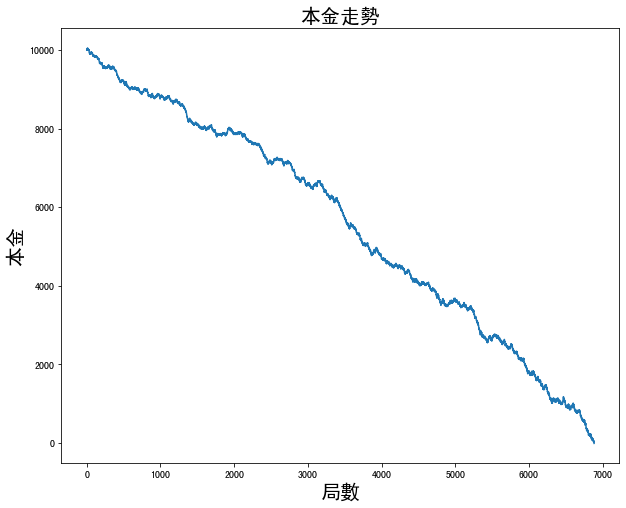

In [9]:

pp = log_df['money'].plot(figsize= (10, 8))
fig = pp.get_figure()
plt.xlabel('局數',fontsize = 20)
plt.ylabel('本金',fontsize = 20)
plt.title('本金走勢',fontsize = 20)

plt.show()

fig.savefig('./q52_mymoney.png')

In [20]:
fig = px.line(log_df,x="count", y="money", title='輸贏比',labels=dict(count="局數", money="本金金額"))
# fig = px.line_3d(log_df, x="count", y="money", z="bet")
fig.show()
fig.write_html("./line2.html")

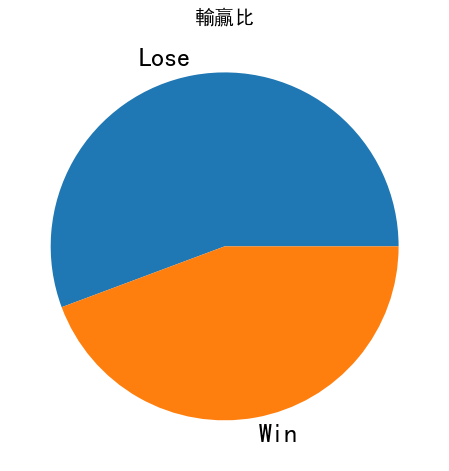

In [10]:
pp = log_df.loc[log_df['result']!='尚未開局','result'].value_counts().plot(kind='pie',figsize= (10, 8), fontsize=26)



fig = pp.get_figure()

plt.title('輸贏比',fontsize = 20)
plt.ylabel('',fontsize = 20)
plt.show()

fig.savefig('./q52_win2lose.png')

In [18]:
pie_df = log_df.loc[log_df['result']!='尚未開局','result'].value_counts().to_frame().reset_index()
pie_df = pie_df.rename(columns={"index": "結果", "result": "總計"})

# 
fig = px.pie(pie_df, values='總計', names='結果', title='輸贏比' )

fig.show()
fig.write_html("./pie2.html")

In [15]:
fig = px.line(log_df, x="count", y="bet", title='賭金走勢',labels=dict(count="總數", bet="賭資金額"))
fig.show()
fig.write_html("./bet2.html")

In [ ]:
import plotly.express as px

df = px.data.gapminder()

fig = px.bar(log_df, x="count", y="money",
  animation_frame="count", range_y=[0,len(log_df.index)])
fig.show()